<a href="https://colab.research.google.com/github/ldubrovskaya/IntroToAeroTau/blob/main/Calibration_of_Seven_Hole_Probe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calibration of Seven Hole Probe

# Explanation

## The Seven-Hole Probe

<div align="center">
<img src="https://github.com/arielya/SevenHoleProbe/blob/master/images/seven-hole-probe-02.png?raw=1"  text-align="center" align="center" width="40%"/>

<b>Figure 1</b>: Seven-hole probe front and side view with its fixed-body coordinate system <sup>[3]</sup></div>

## The Calibration

The seven-hole probe needs as an input for the calibration angles in two different coordinate systems. Depending on the case, angles should be in a polar or a tangent coordinate system. The reference system is determinated by the hole with the greatest pressure. If the maximum pressure detected by the center hole, then the tangential reference system will be used, which is also related to small flow angles. Otherwise, the polar reference system will be used, which is defined for greater flow angles. Similarly, the angles output after the calibration will be in the same reference system. Here, the probe is divided into sectors, as proposed in Figure 3. Sector 7, is the center hole, and sectors 1 through 6 are the polar holes.

Figure 2 shows the seven-hole probe in a wind tunnel. The coordinate system is the probe fixed-body coordinate system. Vector $V$ is the flow velocity and $u$, $v$ and $w$ are the velocity's components relative to the probe coordinate system. The angles $\alpha_T$ and $\beta_T$ are the tangential reference system, and the $\theta$ and $\phi$ are polar reference system.


<div align="center">
<img src='https://drive.google.com/uc?export=view&id=1Xk9QrUb0M36mFm6CVVuwchqn7Zs1LV0B'  text-align="center" align="middle" width="80%"/>

<b>Figure 2</b>: Left: The seven-hole probe with its coordinate system and relative flow, right: the seven-hole section deviation <sup>[3]</sup></div>

The conventional reference system depends on the equipment setup. In Figure 2, the $\alpha$ and the $\beta$ represent the rotation of the $z$-axis with $\alpha$ followed by the $y$-axis with $\beta$.

The conventional reference system in this document is different, since the following examples have a different servo motor system and a different probe holder system. In the next section, it will be explained how to get the equations for the conventional reference system. Afterward, the transformation from the conventional reference system to the other systems, tangential or polar, will be discussed. Two probe holders will be presented, which will create two different conventional reference systems.

As well as for the angles as for the calibration pressure coefficients, it distinguishes between the two reference systems. In the next section, the pressure cofficients will be reviewed as well as the referenced angles.

### Calibration - Pressure Coefficients

The complete set for the calibration includes three independent pressure coefficients resolved into the tangential or polar reference system. The final calibration coefficients matrix $K_n$ is a 20 by 4 matrix for each pressure hole or section, $n$. The coefficient matrix $C$ ist a 20 by 1 matrix. By $C$, the 20 entries of the matrix are built by a third degree polynomial from three pressure coefficients, $C_{\alpha_T}$ or $C_{\theta}$, $C_{\beta_T}$ or $C_{\phi}$ and $C_M$. Multiplication of these two matices yields the results vector $A$, which is a 1 by 4 vector with two angles and two pressure coefficients.
To solve the optimization problem and find the calibration coefficients matrix $K$, the result vector $A$ must be known: the two angles, $\alpha_T$ or $\theta$ and $\beta_T$ or $\phi$, and the two pressure coefficients $C_o$ and $C_q$. The next section defines the equations of the pressure coeffiecients, depending on the reference system. The angles will be disscused in the next section.

### Coefficients Matrix $C$
#### Tangential Reference System

The three ceofficients that build the polynom in the coefficient matrix in the tangential reference system are defined as follows:

$$
\begin{align}
  C_{\alpha_T} &= \frac{2}{3}\left( C_{\alpha a} +  \frac{1}{2}C_{\alpha b} -  \frac{1}{2}C_{\alpha c} \right)  \\
  C_{\beta_T} &  = \frac{2}{3}\left( \frac{\sqrt{3}}{2}C_{\alpha a} + \frac{\sqrt{3}}{2}C_{\alpha b} \right)
\end{align}
$$
and
$$
\begin{align}
  C_{M} &= ( P_7 - \overline{P}_{1-6} ) / P_7
\end{align}
$$

where
$$
\begin{align}
  C_{\alpha a} &= \left( P_4 - P_1 \right) / ( P_7 - \overline{P}_{1-6} ) \\
  C_{\alpha b} &= \left( P_3 - P_6 \right) / ( P_7 - \overline{P}_{1-6} )\\
  C_{\alpha c} &= \left( P_2 - P_5 \right) / ( P_7 - \overline{P}_{1-6} )
\end{align}
$$

#### Polar Reference System

By the polar reference system, instead of $C_{\alpha_T}$, $C_{\beta_T}$ and $C_{M}$ the following coefficients for a cetain sector $n$ will be used:

$$
\begin{align}
  C_{\theta n} &= \frac{ P_n - P_7 }{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) } \\
  \\
  C_{\phi n} &= \frac{ P_{n-1} - P_{n+1} }{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) } \\
  \\
  C_{M n} &= \frac{ P_{n} - \frac{1}{2}(P_{n-1} + P_{n+1}) }{ P_n }
\end{align}
$$

where $n$ represents the outer port numbers $(n = 1, ..., 6)$. When $n = 1$, replace $n-1$ with 6, and when $n = 6$, replace $n+1$ with 1.

The three pressure coefficients above, build the ceofficients matrix $C$, which will be defined in the code.


$$ C = \left[ 1,\ C_{\theta},\ C_{\phi},\ C_{M},\ C_{\theta}^2,\ C_{\phi}^2,\ C_{M}^2,\ C_{\theta} C_{\phi},\ C_{\theta}C_{M},\ C_{\phi}C_{M},\ C_{\theta}^3,\ C_{\phi}^3,\ C_{M}^3,\\ C_{\theta}^2 C_{\phi},\ C_{\theta}^2 C_{M},\ C_{\theta} C_{\phi}^2,\ C_{\theta} C_{M}^2,\ C_{\phi}^2 C_{M},\ C_{\phi} C_{M}^2,\ C_{\theta} C_{\phi} C_{M} \right]$$

$ \\ $

$$ (A) = [C](K) $$


### The Result Vector $A$

Two pressure coefficients toegther with the two corresponding angles build the result vector $A$. By the calibration, it will be used to solve the optimition problem and to find the calibration coefficients of the matrix $K$ for each hole. The pressure coefficients are the total pressure coefficient, $C_o$, and the dynamic pressure coefficient, $C_q$.

For tangenial reference system, the vector $A$ defindes as:

$$
\begin{align}
  A = \left[\alpha_T,\ \beta_T,\ C_o,\ C_q\right]
\end{align}
$$
and for the polar system:
$$
\begin{align}
  A = \left[\theta,\ \phi,\ C_o,\ C_q\right]
\end{align}
$$

In the calibration process we know the velocity, or the static pressure, and the angles. Then we use thus to estimate the pressure coeffiecient, $C_o$ and $C_q$. For the tangenial reference system:

$$
\begin{align}
  C_o &=& (P_7 - P_o) / ( P_7 - \overline{P}_{1-6} ) \\ \\
  C_q &=& ( P_7 - \overline{P}_{1-6} ) / (P_o - P_\infty)
\end{align}
$$
and for the polar system:
$$
\begin{align}
  C_o &=& \frac{ P_n - P_o }{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) } \\ \\
  C_q &=& \frac{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) }{ P_o - P_\infty }
\end{align}
$$

$P_\infty$ is the static pressure and $P_o$ is the total pressure.

### The Calibration Algorithm

The seven-hole probe moves in the wind tunnel and measures the pressure in a range of positions of alpha and beta angles. This data will be set into an array, where each element represents a struct with the measured data of a certain position defined by servo motor angles, alpha and beta.

After the initialization, the code will go through all the measured points and estimate the relevant coefficient and angles for each probe position. First, it pinpoints the maximal pressure hole, which will determine the reference system for the calculation of the coefficients and the angles.

If the maximum pressure is found to be coming from the center hole, the calculatulation will be done with tangential reference system equations. Maximal pressure by any other hole will be calculated with polar reference system equations. Three coefficients and two angles are estimated for each point and are saved into an array (or list) of results for each hole.

Finally, for each hole, a matrix of calibration constant coefficients $K_n$ is estimated algebraically by matrix multiplication of the coefficient matrix $C_n$ with the known result vector $A_n$.

Here, the transformation from the servo motor angles, alpha and beta, to the polar or tangential angles is missing. The next step is to estimate these angles in $A$ to complete the equation system.

The transformation from the inertial coordinate system fixed by the wind tunnel to a fixed-body coordinate system is calculated by rotating $\alpha$ followed by $\beta$.

$$
\begin{equation}
\vec{U}_{body} = T_\beta T_\alpha \vec{U}_{iner}
\end{equation}
$$

When $T_\alpha$ and $T_\beta$ are the transformation matrices in $\alpha$, and $\beta$. $U_{body}$ is the velocity vector in a fixed body coordinate system, the vector $U_{iner}$ is the velocity vector inertial system. In the wind tunnel, this is equal to $U_{iner} = \left[ u_\infty, 0, 0\right]$.

In the next sections, two cases will be discussed. Each case uses a different holder to connect the probes to the servo motors and therefore creates a different equation system for the calibration of the seven-hole probe.

The Figure below shows the probe mount in the wind tunnel and its coordinate system. Left, is the probe with the L-mount and in the right Figure, the probe mount by so-called X-mount. The probe coordinate system is fixed as described in Figure 1. In Figure 4, the probes are in an initial position of $\alpha = 0$ and $\beta=0$, and the probe coordinate system is equal with the wind tunnel's coordinate system. The difference between the two is the rotation that the probe undergoes when the servo motors rotate.


<div align="center">
<img src='https://drive.google.com/uc?export=view&id=1FY8tR6x0rovhosUgxjMwQ03k_warp40F'  text-align="center" align="middle" width="45%"/>
<img src='https://drive.google.com/uc?export=view&id=1wxiKqdOFyoR7Xc34JgpEjc4hjKDkQJCK'  text-align="center" align="middle" width="45%"/>

<b>Figure 4</b>: Left: L-mount rotation in $y$ and $z$ axes, right: X-mount rotation in $y$ and $x$ axes</div>


### X-Mount

Similar to the calibration in the last section, the seven-hole probe can be calibrated also when using another servo motor system or probe Mount. In this section, the same servo system with a different mount will be used. The mount enables the rotation of the probe in its $y$-axis, followed by a rotation around its $x$ axes. The equation for the transformation from the internal wind tunnel system to the probe reference system can be described by:

$$
\begin{equation}
  \vec{U}_{probe} = T_x(\beta) \cdot T_y(\alpha) \cdot \vec{U}_{WT}
\end{equation}
$$

Multiplication of this equation results in the velocity vector of the probe reference system as follows:

$$
\begin{equation}
  U_{probe} =
  \begin{bmatrix}
      u_x \\
      u_y \\
      u_z
   \end{bmatrix} =
   \begin{bmatrix}
       U_\infty \cdot \cos(\alpha)  \\
       U_\infty \cdot \sin(\alpha) \cdot \sin(\beta)  \\
       U_\infty \cdot \sin(\alpha) \cdot \cos(\beta)
   \end{bmatrix}
\end{equation}
$$

Extract from these equations, the angles for the polar reference system to provide a simple relation between $\alpha$ and $\beta$ and $\theta$ and $\phi$.

$$
\begin{align}
  \theta &= \arccos\left[\frac{u_x}{U_\infty}\right] = \alpha \\
  \phi &= \arctan\left[\frac{u_y}{u_z}\right] = \beta \\
\end{align}
$$

To estimate the relation between the servo angles and the tangential angles, the velocity components must be inserted into the tangential equations. Solving these equations result in the following relations:

$$
\begin{align}
  \alpha_T & = \arctan \left[\frac{u_z}{u_x}\right] = \arctan\left[ \tan(\alpha) \cdot \cos(\beta) \right] \\
  \beta_T & = \arctan \left[\frac{u_y}{u_x}\right] = \arctan\left[ \tan(\alpha) \cdot \sin(\beta) \right]
\end{align}
$$

The code below calculates the corresponding the velocity vectors, polar and tangential angles for each $\alpha$ and $\beta$.


### Calibration matrix K

During probe calibration, data are taken to provide a representative sampling of all possible flow conditions. The data points are allocated to the appropriate sectors and the corresponding pressure coefficient variables are evaluated. A third-order polynomial expansion of the coefficients is used to represent the flow properties. For the inner sector this expansion takes on the form:

$$ A_i = \left( K_1 + K_2 C_{\theta} + K_3 C_{\phi} + K_4 C_{M} + K_5 C_{\theta}^2 + K_6 C_{\phi}^2 + K_7 C_{M}^2 + K_8 C_{\theta} C_{\phi} + K_9 C_{\theta}C_{M} + K_{10} C_{\phi}C_{M} + K_{11} C_{\theta}^3 + K_{12} C_{\phi}^3 + K_{13} C_{M}^3 + K_{14} C_{\theta}^2 C_{\phi} + K_{15} C_{\theta}^2 C_{M} + K_{16} C_{\theta} C_{\phi}^2 + K_{17} C_{\theta} C_{M}^2 + K_{18} C_{\phi}^2 C_{M} + K_{19} C_{\phi} C_{M}^2 + K_{20} C_{\theta} C_{\phi} C_{M} \right)_i$$

where A is one of the flow properties $ \alpha_T, \beta_T, C_o, C_q $. A sample set of m data points is taken for the given sector (a minimum of 20 samples must be taken to uniquely define the 20 $K$'s). The subscript $i$ identifies the equation as representing the value of the flow property measured for the $i$th data point. A set of four such equations, each equation representing one of the four flow properties, is determined for each of the seven probe sectors. The $K$'s are calibration constants where the subscript identifies the term in the expansion and the superscript identifies which of the four expansions. The terms $ C_{\alpha T}, C_{q T} $ and $C_{M 7}$ are the appropriate pressure coefficient variables evaluated for the /th data point.

In the case of high angle (outer sector) measurement, equation is modified by replacing $ C_{\alpha T}, C_{\beta T} $ and $C_{M 7}$ with $ C_{\theta n}, C_{\phi n} $ and $C_{M n}$, respectively. The term A then represents one of the flow properties $ \theta, \phi, C_{o n}, C_{q n} $.

Equation:

$$ [A] = [C] [K] $$

where the m x 1 A matrix contains m values of one of the four flow properties, the m x 20 C matrix contains the corresponding expanded pressure coefficient variables, and the 20 x 1 K matrix contains the calibration constants.

$$
\begin{equation}
    \begin{bmatrix}
      A_1 \\
      A_2 \\
      .\\
      .\\
      .\\
      A_m
   \end{bmatrix} =
   \begin{bmatrix}
      1 \ \ C_{\theta 1} \ .\ .\ .\ C_{\theta 1} C_{\phi 1} C_{M 1} \\
      1 \ \ C_{\theta 2} \ .\ .\ .\ C_{\theta 2} C_{\phi 2} C_{M 2} \\
      .\\
      .\\
      .\\
      1 \ \ C_{\theta m} \ .\ .\ .\ C_{\theta m} C_{\phi m} C_{M m}
   \end{bmatrix}
   \begin{bmatrix}
      K_1 \\
      K_2 \\
      .\\
      .\\
      .\\
      K_{20}
   \end{bmatrix}
\end{equation}
$$

During calibration, the quantities within the A matrix are set by the experimenter. Moreover, the local total and static pressures at the probe are equal to their freestream values. After measuring the port pressures at these preset flow conditions, the quantities within the C matrix can be calculated. The calibration procedure, therefore, involves the calculation of the unknown calibration constants of the K matrix. The calibration constants are unique to each probe and are determined with matrix algebra according to the procedure outlined by Netter and Wasserman:

$$ [K] = [C^T C]^{-1} [C]^T [A] $$

Using this technique, the calibration constants are determined from a least-squares-curve fit to the experimental data. Having determined the calibration constants, the calibration process is complete and the probe is ready for use in unknown flowfields. Once iii an unknown flowfield, the highest measured probe pressure determines which set of pressure coefficients applies.


Using K (tang):

$$ P_o = P_7 - C_o (P_7 - P_{1-6}) $$

$$ P_o - P_\infty = \frac {P_7 - P_{1-6}}{C_q} $$

# Calibration code

## Getting the measurement data from files


In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

We have 3 different velocities:

$$ V = (10, 15, 20) \ [m/s]$$

For each one of them we have to calculate calibration matrix (seven of them - for each hole). For each velocity we will create a dictionary - "MeasPoints_Vi", with relevant names and data inside.

So we will have a list of 3 dictionaries - "SHMeasPoints".

This function get the relevant data from excel file and add it to the dictionary.

Relevant data:

- dencity;
- pressure pitot;
- velocity of the flow (pitot);
- atm. pressure;
- pressure from each hole (7 points).

In [42]:
def get_data(url, data):
  worksheet = gc.open_by_url(url).sheet1
  # get_all_values gives a list of rows.
  rows = worksheet.get_all_values()
  rows = np.array(rows)

  names = rows[1, :]
  values = rows[2:, :]

  # Convert to dictionary
  data_point = {name: values[:, idx] for idx, name in enumerate(names)}

  # Convert to numeric types
  rho = np.array(data_point['Density [kg/m^3]']).astype(float)
  Ppitot = np.array(data_point['Pressure Pitot [Pa]']).astype(float)
  Uinf = np.array(data_point['Velocity Pitot [Pa]']).astype(float)
  Po = np.array(data_point['Atm.Pres. [Torr]'].astype(float))*133.322
  P1 = np.array(data_point['ESP_CH1']).astype(float)
  P2 = np.array(data_point['ESP_CH2']).astype(float)
  P3 = np.array(data_point['ESP_CH3']).astype(float)
  P4 = np.array(data_point['ESP_CH4']).astype(float)
  P5 = np.array(data_point['ESP_CH5']).astype(float)
  P6 = np.array(data_point['ESP_CH6']).astype(float)
  P7 = np.array(data_point['ESP_CH7']).astype(float)

  for i in range(3):
      data[i].append({
          "rho": rho[i+1],
          "Uinf": Uinf[i+1],
          "Pinf": Ppitot[i+1] + Po[i+1],
          "Po": Po[i+1],
          "p": [P1[i+1], P2[i+1], P3[i+1], P4[i+1], P5[i+1], P6[i+1], P7[i+1]],
      })

We need to add links of GSheet in the right order. It have to be the order of the angles. First of all $\alpha$:

$$ \alpha: [-70 → 70] $$

And for each $\alpha$:

$$ \beta: [-70 → 70] $$

We create an array of arrays in the order of angels and add the links. Now we can use a loop to run through all data.

$$ [alphas  [betas] ] $$

But order of the data is:

$$ [betas [alphas]] $$

#### Data links

In [43]:
# beta = -70, alpha = [-70 -> 70]
bm70 = ['https://docs.google.com/spreadsheets/d/1UnWvYglAhH5tFkKgwnqF41MI_XQNzObyFber6s-b1xg/edit?gid=1296137485#gid=1296137485',
        'https://docs.google.com/spreadsheets/d/1JLx_vMOZkYtVfBMqoS5s__NsLMEaiuUAOmPGGP3fm_8/edit?gid=1036714986#gid=1036714986',
        'https://docs.google.com/spreadsheets/d/1K3_uOSutkwzXNvUzxD8psBVlUVnIztxiEiv27sYFpWc/edit?gid=279443366#gid=279443366',
        'https://docs.google.com/spreadsheets/d/1u_jZ_1zEaOKwQ84TPNTJpQ6Pbvu583MyTdTWs9HEq3I/edit?gid=1930281429#gid=1930281429',
        'https://docs.google.com/spreadsheets/d/1nHKIWnFoA6pwuS3GCZE7pDRsfcVtqHdD4go01L-YyoE/edit?gid=1904809993#gid=1904809993',
        'https://docs.google.com/spreadsheets/d/1DQxMiDjE8APUjtgO9n3NW9TWLXErQcYaJjuae39-Y9M/edit?gid=1309594017#gid=1309594017',
        'https://docs.google.com/spreadsheets/d/1wnAio12G5hCTchgMWN_uL77GdD5wcS90OeGAEyohvE0/edit?gid=1689533335#gid=1689533335',
        'https://docs.google.com/spreadsheets/d/18rKLOnq_KTXlM_bce0rKSW0_xzw4uIP3K02OLc5NTLY/edit?gid=1504912573#gid=1504912573',
        'https://docs.google.com/spreadsheets/d/1aZy7T49QTvQTY9TEsf2tkYFUttQMsQ-8DEIHuRK9IyQ/edit?gid=1710181937#gid=1710181937',
        'https://docs.google.com/spreadsheets/d/1tfH4paKM3VM6ZJZIgOD7I780ZaYD0Sv8992Us7o7ZIY/edit?gid=932932599#gid=932932599',
        'https://docs.google.com/spreadsheets/d/1ciyj-mfJ9hnmL7fZRqw6EQmAnhmizXgYefiO8drBYqM/edit?gid=1614971373#gid=1614971373',
        'https://docs.google.com/spreadsheets/d/1XHZ-9sS-W3Kcr2IZBxOV519ZAeBLE3eCpu_R_j-WkhQ/edit?gid=225369348#gid=225369348',
        'https://docs.google.com/spreadsheets/d/1c1RFITJv6QsGUgPtzIrFKAmWCPKG4lZkI0E5Sk_XKVA/edit?gid=1826168768#gid=1826168768',
        'https://docs.google.com/spreadsheets/d/1qAPho3YZ3GmQSIWDvd5Mfu44rwF8HAJzrVgHdyOXvJ8/edit?gid=572875804#gid=572875804',
        'https://docs.google.com/spreadsheets/d/1bc2vaYQqDSHveuJY2Lz3Pl67TEsSuTf_bWwhn5V9OmQ/edit?gid=459725328#gid=459725328']

In [44]:
# beta = -65, alpha = [-70 -> 70]
bm65 = [ 'https://docs.google.com/spreadsheets/d/1IRcpuPZEQlp7pVZzAjtSxUuDaFw_NIvXBbgHrPuXiGs/edit?gid=1043468603#gid=1043468603',
        'https://docs.google.com/spreadsheets/d/1ZslutDPJSum6tAKF5qEAXGG90MLSxA0MG9D9dzTs7mo/edit?gid=330852209#gid=330852209',
         'https://docs.google.com/spreadsheets/d/10fTezdrM4xehhCPIONf0IgOT_Z-jzVoo8SBQKC192IU/edit?gid=1600146688#gid=1600146688',
         'https://docs.google.com/spreadsheets/d/1-pKOxg49Z9TO1diw7ho8tCNQFiJn6tr_DGtkYaaOPj8/edit?gid=232946065#gid=232946065',
         'https://docs.google.com/spreadsheets/d/1HdMKiNi_MiaEgrB7MXRF7eE5MrkRRzPY49joyTozR24/edit?gid=182796396#gid=182796396',
         'https://docs.google.com/spreadsheets/d/1ExCbPr_-iGZpTQhLf0hxfDNZlwVZPABVq4TZmMsd1cM/edit?gid=593318510#gid=593318510',
         'https://docs.google.com/spreadsheets/d/1LXbrpV9j-1ukYb5q2gS-gcu110Ku8scloGITtqycziQ/edit?gid=1657549630#gid=1657549630',
         'https://docs.google.com/spreadsheets/d/1Ysi6rGdUuPCS0X-qU8ww96MOC7FeE9v9GbLaFDV5Jc0/edit?gid=1185859716#gid=1185859716',
         'https://docs.google.com/spreadsheets/d/1wVG8sEqgivuXkGaWuW3yIzjY1gYy740MdU4k8Guzuos/edit?gid=1018373#gid=1018373',
         'https://docs.google.com/spreadsheets/d/1ioWNexX05uX--uhQo8jbYAnCVTxiMlUOhB_4scdhV8U/edit?gid=932599486#gid=932599486',
         'https://docs.google.com/spreadsheets/d/1TjKcitdLTFwx2ZHfrLRmrAjvblSdZOibOM_YzmFv7rg/edit?gid=289698208#gid=289698208',
         'https://docs.google.com/spreadsheets/d/1qixakn4tclxvy_FpWzsubpPtTt1otY8AZOTM8iScMLM/edit?gid=1313879516#gid=1313879516',
         'https://docs.google.com/spreadsheets/d/1sDzr7clfzxp2i1X4uu43aNaEjmf8iDEpKuwrWF2cDA8/edit?gid=1050939514#gid=1050939514',
         'https://docs.google.com/spreadsheets/d/1L4rxrpnDjWUMQU33-yczuVDb07KZZNNp23lbP93Wemw/edit?gid=466372873#gid=466372873',
         'https://docs.google.com/spreadsheets/d/1MRGjMoG2eUL4AKVBCAkd1HsJ3bZKksc5IJle2OKaTqM/edit?gid=546069971#gid=546069971']

In [45]:
# beta = -60, alpha = [-70 -> 70]
bm60 = ['https://docs.google.com/spreadsheets/d/1c4QkP9BfQNQNzn6RgyAxXyzcCtTImmB5J8I3saeWkzY/edit?gid=227799793#gid=227799793',
        'https://docs.google.com/spreadsheets/d/1d-Wp6Ysb3vxsAHDkOHxfImNitFw9qnL2FTChCuzbs3c/edit?gid=255381805#gid=255381805',
        'https://docs.google.com/spreadsheets/d/1KhNL8Jy9YZK_E6OTh0uHSQZV24lQqVmYLlp3oSKWJPM/edit?gid=502620843#gid=502620843',
        'https://docs.google.com/spreadsheets/d/1_SGSIu5zOAin_fLl8OB1jTMFTU6XliRQgycFo2Ehn1E/edit?gid=19908669#gid=19908669',
        'https://docs.google.com/spreadsheets/d/17lUcbe9IrimAhiG6nm50mdIQojtxTatNss-nJ6oOK-8/edit?gid=809225187#gid=809225187',
        'https://docs.google.com/spreadsheets/d/1VHMtRFOhYETX28L_O5RyT4zSWdiJQWeRzCzG9tqplx8/edit?gid=1027751868#gid=1027751868',
        'https://docs.google.com/spreadsheets/d/1L4RmKYkKq9CNTZ0HRn5n2DohrnyCT54OW9vn83GPrt0/edit?gid=511901675#gid=511901675',
        'https://docs.google.com/spreadsheets/d/1dgy7-2I8SZeZj0Ela1NBoUlQspJ_nYewxQzow3iHdJc/edit?gid=1211339034#gid=1211339034',
        'https://docs.google.com/spreadsheets/d/11vXsiDj0jaIZt_JZkRLzHc5y79bNDQCdiBJVBO1Zum0/edit?gid=1876151809#gid=1876151809',
        'https://docs.google.com/spreadsheets/d/1E3nXLrh-WyTFjECl_WMdc8GbuhcxRWcWp6MnNzcGRtw/edit?gid=1261693096#gid=1261693096',
        'https://docs.google.com/spreadsheets/d/1YFwpnnZ1-BDjH76Lz7UpSV4y5IVYLL27cICtN-TFJYs/edit?gid=642393022#gid=642393022',
        'https://docs.google.com/spreadsheets/d/164Dw99Xp52KK1CGWRJuUKg1aahR4OpQt8da1U3B1LdU/edit?gid=163360248#gid=163360248',
        'https://docs.google.com/spreadsheets/d/1zzHC23V3lsszQWlKsGFL2APMwoSnP8UEs1ERvmEaLFU/edit?gid=904997345#gid=904997345',
        'https://docs.google.com/spreadsheets/d/1FLB5S1QqdzXcPuDXT-Fi-KroYIfNT8d2mcLgcwRdRzk/edit?gid=525766450#gid=525766450',
        'https://docs.google.com/spreadsheets/d/1JML5KIPE5EhPpEGbhzMQwEF62WlUaHFzdEikIZnN-JY/edit?gid=8840061#gid=8840061']

In [46]:
# beta = -55, alpha = [-70 -> 70]
bm55 = ['https://docs.google.com/spreadsheets/d/1yZ_TQ-cm-sjtLK3k1zIqDnWT746XV7p0T1cdKvLPzVA/edit?gid=232311563#gid=232311563',
        'https://docs.google.com/spreadsheets/d/1lRDNL2LTX5sBgBV4bGzecysVhCCA3_iLsLeViUgsVA8/edit?gid=777529537#gid=777529537',
        'https://docs.google.com/spreadsheets/d/1IIAZWjoG7MpiURAtlUepSt8ov-vBaowwdwVmT0DpkWo/edit?gid=1518237798#gid=1518237798',
        'https://docs.google.com/spreadsheets/d/1X3Nf95NLpshXZS1vnhbEFPWSzMV_780GtqCSstFanJE/edit?gid=1513538352#gid=1513538352',
        'https://docs.google.com/spreadsheets/d/1gEx5qOTpIYhdpKTMYaOCT5v87nTb8fOsaS_haAmgNNs/edit?gid=1389215279#gid=1389215279',
        'https://docs.google.com/spreadsheets/d/1pba8sm933dVHPB3FoN6NFUeLDOG_DOJM7oiHc3DGbyI/edit?gid=366022301#gid=366022301',
        'https://docs.google.com/spreadsheets/d/1ksaEOII9Zeuj8Hlaf1ybEwQOtanFAYeUOt5rr83CBLo/edit?gid=1236636677#gid=1236636677',
        'https://docs.google.com/spreadsheets/d/1YNhafTWVW4sa1Ko30dfOm_nnortiyGoRDZVY2OMC5nk/edit?gid=36108239#gid=36108239',
        'https://docs.google.com/spreadsheets/d/1WB2EXGKuN76mor3CFsfKxEJ8N1AabMWU5BJKzXsJzeM/edit?gid=1191032786#gid=1191032786',
        'https://docs.google.com/spreadsheets/d/1-o8RXP6K3QOKYzdHEXQxKix6syt4M96aEjQf6oSmrNw/edit?gid=739925116#gid=739925116',
        'https://docs.google.com/spreadsheets/d/18V2psAzeD2SmQR1A1kpm_qiCKds3j5a5pBjd2H4GQ40/edit?gid=139821639#gid=139821639',
        'https://docs.google.com/spreadsheets/d/1e7MDXofxx13Cb1IU--0K171dNwFfAaGJ1OQI8jnrbng/edit?gid=2076022245#gid=2076022245',
        'https://docs.google.com/spreadsheets/d/16rdphXVKgzcovwT5mFZSbKMJPvnKf08LRUcxe7Q10oo/edit?gid=1015297752#gid=1015297752',
        'https://docs.google.com/spreadsheets/d/1cbWBuY5WUhQD_iod5XIhH6b466qO_NUClgzJXkkto5c/edit?gid=989375171#gid=989375171',
        'https://docs.google.com/spreadsheets/d/17R3HpdWiivyfilczMfnE8rcnHOQJHbIJpgcHK9zmMuc/edit?gid=1059298126#gid=1059298126']

In [47]:
# beta = -50, alpha = [-70 -> 70]
bm50 = ['https://docs.google.com/spreadsheets/d/1RSUvHQ4rvJJX6t91bRFJMdUMAZBGSkGw7xH_zATYyBE/edit?gid=1678652959#gid=1678652959',
        'https://docs.google.com/spreadsheets/d/1gKc3eS6dYasFV_x0MrwYo6Zg21p5Gn-N2Njfc5wCRL0/edit?gid=2018403924#gid=2018403924',
        'https://docs.google.com/spreadsheets/d/1hmSMqXYw8ffSFGfBNe0C-LCw-3wk1FLBO-d-TVtujoU/edit?gid=403861237#gid=403861237',
        'https://docs.google.com/spreadsheets/d/1yOMhuATQ2Ah_N_RsW7i4SyXhEPbCYjCTjJH1bq-hqP0/edit?gid=910018459#gid=910018459',
        'https://docs.google.com/spreadsheets/d/1K6vce4jbZrEaDIL0wzv-sD-oEWQfxSEJdLAJonVr5Hc/edit?gid=1937409712#gid=1937409712',
        'https://docs.google.com/spreadsheets/d/1GiY9Kj8wIztK6ubS3MekrxA-0EqKx6SHx_SrF1uQ9XY/edit?gid=131064111#gid=131064111',
        'https://docs.google.com/spreadsheets/d/17l-jjFUNGgcX29Wp_Fu3gs9i8S04CLyRd7p5TM9j6B0/edit?gid=2075385451#gid=2075385451',
        'https://docs.google.com/spreadsheets/d/1nl2WYbmvR1iK6va0zJ66J3ekK5rfXwATJHtdCCXpfX8/edit?gid=2039058657#gid=2039058657',
        'https://docs.google.com/spreadsheets/d/1MYnWBMHncsc8yR9wFmL8sVLMnMsJGrEKT2XorbQHPnc/edit?gid=796309258#gid=796309258',
        'https://docs.google.com/spreadsheets/d/1_lld2bNg92VXjnrFj3_FPtUD3EQ3772LK44yakWBSt0/edit?gid=1199236180#gid=1199236180',
        'https://docs.google.com/spreadsheets/d/1knEULEn2rgs4BWtt04i1ib_HKuOCWJZaI0RnI3pX9_E/edit?gid=668776865#gid=668776865',
        'https://docs.google.com/spreadsheets/d/1icHbfclMo0USLESAabMHa3Pje9QEBGLsbYeuNHZsBLM/edit?gid=2044448195#gid=2044448195',
        'https://docs.google.com/spreadsheets/d/1uaaQUrX8LFPIbjvJ-_66TUtzG_aFe5pGL3JocwK7dYo/edit?gid=833386646#gid=833386646',
        'https://docs.google.com/spreadsheets/d/1YBc5x2lKwUZbPDdYV9zYgIQqQaiHqXNm2VewAl2dXG4/edit?gid=494935571#gid=494935571',
        'https://docs.google.com/spreadsheets/d/18g3WvNh4wLdTvuXAzzWu-xjLp4VDCzHAl8S_-Kynyrw/edit?gid=2058156068#gid=2058156068']

In [48]:
# beta = -10, alpha = [-70 -> 70]
bm10 = ['https://docs.google.com/spreadsheets/d/1aMMe8-khZ43WgAbPYEDuI7e2PKaza1e3YEVP_yyiNTQ/edit?gid=1243005520#gid=1243005520',
        'https://docs.google.com/spreadsheets/d/1dhAlJcnmSik1alEJ2TpEnx9OoFCPQnqAc-j-FOa-YBk/edit?gid=1060807276#gid=1060807276',
        'https://docs.google.com/spreadsheets/d/1wqzFd0Cd0keN1_2JqimAefhFgmc7zxJH_RF7kWVCKnM/edit?gid=1218021972#gid=1218021972',
        'https://docs.google.com/spreadsheets/d/1wJ2I7IJUYpVGoCGMTxW9albYdwceQoO1t13RE9N4Xs4/edit?gid=1584393297#gid=1584393297',
        'https://docs.google.com/spreadsheets/d/1HIFPJ2tWcz6azMkL67e1oZ3ORwPe2YEb-RtGx0p5R_8/edit?gid=1254532914#gid=1254532914',
        'https://docs.google.com/spreadsheets/d/1o1-b9p7VkgsfU4XQlaH1c9KOWsdz9eiLhqsjczxkfHk/edit?gid=936671739#gid=936671739',
        'https://docs.google.com/spreadsheets/d/1qjlcTPc13Ydjrx6Ugrwb4VsVPqZjVQgoHv5_MzLij9w/edit?gid=1967177209#gid=1967177209',
        'https://docs.google.com/spreadsheets/d/1PwBGTv63cv4fQwQ-n1CVndMHS2nCgfMD6iX1sXeCe18/edit?gid=2147357364#gid=2147357364',
        'https://docs.google.com/spreadsheets/d/17Vb7SpQzaV1bZ4eIc9Uz9sp9uZlGCUAF0iVEsC40ZYE/edit?gid=1475430318#gid=1475430318',
        'https://docs.google.com/spreadsheets/d/1OzhgewWniHtwhAlu-TTq-228GyOVV48-BAcagazlp78/edit?gid=1082942682#gid=1082942682',
        'https://docs.google.com/spreadsheets/d/1PczqkwFJmIa9Jtc8shm2PUvmCrdFwiZlKHsrKJ26LdQ/edit?gid=2035264473#gid=2035264473',
        'https://docs.google.com/spreadsheets/d/15fEdeNgPT2k-kHcb74E6tvoSROdGVHS0yfuJ6Ztu0PU/edit?gid=567944669#gid=567944669',
        'https://docs.google.com/spreadsheets/d/1VEjI87KiRbKW8057Aiu0406rvZqzNU86jpDTyard1GI/edit?gid=1477637946#gid=1477637946',
        'https://docs.google.com/spreadsheets/d/1ci-dLA2fZ2haepAxhgsHqshp_ptiRpAZNhvGwGi9NUo/edit?gid=1266308804#gid=1266308804',
        'https://docs.google.com/spreadsheets/d/1SxBj68_3GgwkjoJVCxo4VoK2aehZRCSVy01g2aqZVpA/edit?gid=1658841049#gid=1658841049']

In [49]:
# beta = -5, alpha = [-70 -> 70]
bm5 = ['https://docs.google.com/spreadsheets/d/143PYC8JKl8zaetwyeFhdQz07j6bar4eruvdfKno3eWw/edit?gid=744289245#gid=744289245',
       'https://docs.google.com/spreadsheets/d/17qgn6E07TQr6o3TOvYxGWJ8NkNaomH6Km5tC9A5-ZuU/edit?gid=1131699265#gid=1131699265',
       'https://docs.google.com/spreadsheets/d/1i0R3wEAeSjHu_-W9J8EEN9SsEJG3PS9BwszxIKOotO8/edit?gid=149759515#gid=149759515',
       'https://docs.google.com/spreadsheets/d/1T2oRB_Zs-nnn4SgC_fDUoP5OKN-RqEUuSBOLcX4ebNM/edit?gid=905927585#gid=905927585',
       'https://docs.google.com/spreadsheets/d/1FHcH1KJPhzh9seUVqyWv96Uwfy-SfinIGDdNdNqyW7k/edit?gid=147884642#gid=147884642',
       'https://docs.google.com/spreadsheets/d/1eNnVSUkkvN16DXsCED7Wr2RBus5SriZ1vSFOM6bE3qg/edit?gid=396105933#gid=396105933',
       'https://docs.google.com/spreadsheets/d/1vs3-gldXmxDPUGffdG5Nsabt9UA6rmonSxumdkPZzRc/edit?gid=135646866#gid=135646866',
       'https://docs.google.com/spreadsheets/d/17MmNB8x3cjRuUOXyXYqrrjmvrocJSqtFppn0G4SlXss/edit?gid=1254571282#gid=1254571282',
       'https://docs.google.com/spreadsheets/d/1Ey9i5zlg0DPBwSKQNEZXj0F-ZwRGeIaKQ4U5GiXsreU/edit?gid=654132967#gid=654132967',
       'https://docs.google.com/spreadsheets/d/1ftHI1lezApMpgrC-SwZruWpz2h50XKuuQN6BwG2apUY/edit?gid=1699042876#gid=1699042876',
       'https://docs.google.com/spreadsheets/d/19pGE_DoCPCj5ag0arz6RENGqKWMX36p0UwPcCtspDrw/edit?gid=549810364#gid=549810364',
       'https://docs.google.com/spreadsheets/d/1cenajvnD7qcYZ_QwEtnXw4UmIdZVb8bm7Y4wl255Q-8/edit?gid=1000657511#gid=1000657511',
       'https://docs.google.com/spreadsheets/d/1ag2IhEjoydJdYeT8154AekjI6pHLXmnGXJmgNbT-dLw/edit?gid=283014346#gid=283014346',
       'https://docs.google.com/spreadsheets/d/1zGznXCcxPw29zoVb3ka2MZahAAii2RmO981aZik7Fi4/edit?gid=707069047#gid=707069047',
       'https://docs.google.com/spreadsheets/d/10gK3GilKazAVGnKPD99d6Peu0-gQw0kYEgxkRCj7Pck/edit?gid=348422693#gid=348422693']

In [50]:
# beta = 0, alpha = [-70 -> 70]
b0 = ['https://docs.google.com/spreadsheets/d/18-MAmufjPyN96jy_u4ryCMHzCgR4ZRrwx6RbNrVIJeE/edit?gid=1307151826#gid=1307151826',
      'https://docs.google.com/spreadsheets/d/1NVFfTb_szlYefKIUYbu5euIyqEJc59itoHNosdznEkE/edit?gid=892723725#gid=892723725',
      'https://docs.google.com/spreadsheets/d/1igt7pDButIN3GAtciW_1yTCrZoNpWOe4DcBmz8Ozofo/edit?gid=274193753#gid=274193753',
      'https://docs.google.com/spreadsheets/d/1RRsCEpahJSCUG0AZzrp5XmCjT4SEx6U4hCM9kMXEujc/edit?gid=1329006504#gid=1329006504',
      'https://docs.google.com/spreadsheets/d/1FFVPuILmCQ6i9MBBggamkAfoiWWSHsEE5NSdjg9cK5g/edit?gid=1354900989#gid=1354900989',
      'https://docs.google.com/spreadsheets/d/14PO7BQ8aPd1l_eGrEoFoYutvERawupICp7HPTNZ6KRY/edit?gid=36008990#gid=36008990',
      'https://docs.google.com/spreadsheets/d/1agQjGhW64h6YgzKRobsjnqa6O-WqYHcH37yStGh6mnI/edit?gid=646576347#gid=646576347',
      'https://docs.google.com/spreadsheets/d/1zFTpmNznRtGNgHWG_qLKczDElbNA6y4-eF1E6c3t-50/edit?gid=384956427#gid=384956427',
      'https://docs.google.com/spreadsheets/d/1Kuq7xIuntYoDeBoKYJzXd2J2Egyv_jDaZAzD_wVhN3I/edit?gid=430417907#gid=430417907',
      'https://docs.google.com/spreadsheets/d/1FmyYqFyB3WRN-IlyHQJQcNKyYsX_UrDTTRjJArg9bR4/edit?gid=1362068975#gid=1362068975',
      'https://docs.google.com/spreadsheets/d/1PDeFc1GTgV0LPQJBSucAUaJ-tjb7HzBlpSOPxL1m1js/edit?gid=1353276017#gid=1353276017',
      'https://docs.google.com/spreadsheets/d/1K2Ugh-ZjF6YGOha82LrKbL_fleQWXTRecDpFmCPOtzc/edit?gid=1852966296#gid=1852966296',
      'https://docs.google.com/spreadsheets/d/1aBtqchoBNpvdFW1MZmIRGqOo8ImiOHkfmxUbTOfBxUM/edit?gid=695501335#gid=695501335',
      'https://docs.google.com/spreadsheets/d/1ikys0be7iRYat3Qw79LPQqnYcdVqfwTXyVVA4u6xxe8/edit?gid=94631198#gid=94631198',
      'https://docs.google.com/spreadsheets/d/1NRRAgZ5UZnNDYUbIFi6gPcf1Rc4rJ-H6tE7hrcJFG4A/edit?gid=1689933752#gid=1689933752']

In [51]:
# beta = 5, alpha = [-70 -> 70]
b5 = ['https://docs.google.com/spreadsheets/d/1DZlgwj2QinwKKswWv3ZkdGqtJ-flDFZUeIxKygtMQAs/edit?gid=1619019074#gid=1619019074',
      'https://docs.google.com/spreadsheets/d/1EWPWnfXipFAYQAYWqn3aRuMA0nysgIRKSQINHsbr7kI/edit?gid=541672716#gid=541672716',
      'https://docs.google.com/spreadsheets/d/1gQfCOTgKnNMQGBYBAISavAOCUnPFJgajY3yUkeCpyLc/edit?gid=93634506#gid=93634506',
      'https://docs.google.com/spreadsheets/d/10opduNDIH4o1tN9tkYV_SLAHoUN9-TivUmCvjTjItuw/edit?gid=1041476478#gid=1041476478',
      'https://docs.google.com/spreadsheets/d/1xrcGa4bV8DiXVPZPMnH3ekLuBvecpSyJtzXyiQarvYQ/edit?gid=417866991#gid=417866991',
      'https://docs.google.com/spreadsheets/d/1BZwTK_udlZtVjCImr9HQOukQZQZrlO66q-A_gJC2cjg/edit?gid=2146065455#gid=2146065455',
      'https://docs.google.com/spreadsheets/d/1RYcwxCOCjfIBseAZi8h5CinX5pejpGYPfvw5exODd3I/edit?gid=480048020#gid=480048020',
      'https://docs.google.com/spreadsheets/d/1VqcPPIMsmxuorAvAZ1gMUDKE4M9VbemuLRqnh5-4Lpo/edit?gid=1073360059#gid=1073360059',
      'https://docs.google.com/spreadsheets/d/1aoKcycih5bTYTOpjEhm_pgZN4fqLoibymKvEz1KkSAI/edit?gid=313816472#gid=313816472',
      'https://docs.google.com/spreadsheets/d/1V0_uII73kVvAqmQiw3_O6go5vytN_JKPpcSqm3MNeEQ/edit?gid=1862769777#gid=1862769777',
      'https://docs.google.com/spreadsheets/d/1yAyeMf7xYYWQ__603obBNWjyxBJ7Plalg1nDBO-oAD4/edit?gid=1995675166#gid=1995675166',
      'https://docs.google.com/spreadsheets/d/1Qo9bxd78Zdj8DwAbNNmdFeAB1MSR4xikP1JIGB-VK-I/edit?gid=1135335033#gid=1135335033',
      'https://docs.google.com/spreadsheets/d/1qp5cejpnYkExn6OhUB57vwEnrhMA9aPn_VouU4zxBoE/edit?gid=908670234#gid=908670234',
      'https://docs.google.com/spreadsheets/d/13W8KFaxrNWwrdW4n2zu6sR1V_GeVwBF7A8nwoJcGLKE/edit?gid=606567661#gid=606567661',
      'https://docs.google.com/spreadsheets/d/1v_zCOG27Pk2Pj1zuLc_Aq1KZqmL8aHP2FQ7r6cftiSo/edit?gid=2003575797#gid=2003575797']

In [52]:
# beta = 10, alpha = [-70 -> 70]
b10 = ['https://docs.google.com/spreadsheets/d/1_bFmYtwUrTAq1T3D9PxaPG77KpebOM74WQIDQjQchFI/edit?gid=1053701476#gid=1053701476',
      'https://docs.google.com/spreadsheets/d/1eKNB2P16s21RaXqbJ9xuCI5RfCwmT53mxqN83Gzwwf0/edit?gid=1728072747#gid=1728072747',
      'https://docs.google.com/spreadsheets/d/16mh6iZmR7yGWBoZXVzSC9hAg98BYkfelKmG5PJj9QPo/edit?gid=1246473846#gid=1246473846',
      'https://docs.google.com/spreadsheets/d/1iHViUEju67nXMMaxD3UKjEE7PAw83eSjgqhKjUcZ7KY/edit?gid=805511018#gid=805511018',
      'https://docs.google.com/spreadsheets/d/1zWBkrpTzOYYWk7KWb0kntfiMpBXJi2_RDHNh6F-ob_g/edit?gid=600460178#gid=600460178',
      'https://docs.google.com/spreadsheets/d/1cH1BkFzWFctqcMoc_Rq3JMUQWpB1nvigGAqDWgKm2YM/edit?gid=1079008646#gid=1079008646',
      'https://docs.google.com/spreadsheets/d/1WKlUZYPXh4B4bhPRowE0IQ3UWcNqecTN0ig-YFY6RbE/edit?gid=1549480377#gid=1549480377',
      'https://docs.google.com/spreadsheets/d/1efQYKaz_6B5Dk60fR22odO2-4dEf4oolgAIiJb_SPmE/edit?gid=1284800801#gid=1284800801',
      'https://docs.google.com/spreadsheets/d/1tnZhnseliBOCcRzIvn9sgVWS62kfxANNkoE36t2Sn_Q/edit?gid=775924624#gid=775924624',
      'https://docs.google.com/spreadsheets/d/1LeOvXPgyS1PP1h-zWUTafVuhtCT7yKst6QHgci-ymeE/edit?gid=1770770527#gid=1770770527',
      'https://docs.google.com/spreadsheets/d/1MYAj9GwT0x91ECJqjnf1TVovQmZqXgnJbaeSklFggZs/edit?gid=1955419592#gid=1955419592',
      'https://docs.google.com/spreadsheets/d/1R-KcXYJ3MEuiJ0KA-8ZVcjWQNZTHXXNfy5Hiv2WoaHk/edit?gid=529200378#gid=529200378',
      'https://docs.google.com/spreadsheets/d/1o-Jk-R8Rm2WGBDJbxzqK6fMbpshhr8k7rIU6th0B_0Q/edit?gid=1816548265#gid=1816548265',
      'https://docs.google.com/spreadsheets/d/1ELkMxl1fHBDf-tRd5ycm42tXD_14NzwRM2zt_dVvLVE/edit?gid=428662947#gid=428662947',
      'https://docs.google.com/spreadsheets/d/1gk6AoEYVSqp7xO-J_AblAxgg05BkAdC_hNGeVAyKiuU/edit?gid=790566152#gid=790566152']

In [53]:
# beta = 50, alpha = [-70 -> 70]
b50 = ['https://docs.google.com/spreadsheets/d/1iuI3PPptUgVu1DBjHTsyM2mqvqE1w8YUZRibhCSZlpE/edit?gid=1841762299#gid=1841762299',
      'https://docs.google.com/spreadsheets/d/1m6t2Kire8ACkIawGrfFzhsBJTiqmfGCncLrABYihfAo/edit?gid=476716607#gid=476716607',
      'https://docs.google.com/spreadsheets/d/1J1OJk8g28EJ8P4NBrEjLLhHOq1SCMmEqSy8pvw1-1pI/edit?gid=500713259#gid=500713259',
      'https://docs.google.com/spreadsheets/d/1ETSJfy33_zkxKQP6TU2WvdVjXki0pNBHEveWHMcJBTA/edit?gid=1950724738#gid=1950724738',
      'https://docs.google.com/spreadsheets/d/1hqxq2WsrfupRa_AHfsnw6AgMRKFNj3tpK-dtPRQGfLg/edit?gid=1719246327#gid=1719246327',
      'https://docs.google.com/spreadsheets/d/1Az19xPSSW1JvpokYjX7SRnMOjeC86fT8r-372NY-O_0/edit?gid=134999493#gid=134999493',
      'https://docs.google.com/spreadsheets/d/1XuZDvHrul-_5bSRinUNCHS-UDC-newnpT81i9-VukQA/edit?gid=158725986#gid=158725986',
      'https://docs.google.com/spreadsheets/d/1BjaZT_Y5c7hLlo7iMNwkDGU5nOsCh-ArJRdtZ-jeja8/edit?gid=493110968#gid=493110968',
      'https://docs.google.com/spreadsheets/d/1DuKwr7pbzGimA9D2_H7by2GQcIWzehTDCNyTzo7s-EU/edit?gid=6271749#gid=6271749',
      'https://docs.google.com/spreadsheets/d/1O36ieUwjbYX6ZT6Xcdgml2r_HpMqbmUeKs5tgDGzKMQ/edit?gid=885966024#gid=885966024',
      'https://docs.google.com/spreadsheets/d/1EM-oez36dtJ3vwMcv94ycP4X8_45_Ehu-8BAeOU6V0Y/edit?gid=342172558#gid=342172558',
      'https://docs.google.com/spreadsheets/d/1uG651Vvc0sy3rk5d0KOtnMsUh_04hzRV4nZH9QD3IVE/edit?gid=1823530332#gid=1823530332',
      'https://docs.google.com/spreadsheets/d/1gndMjRjQrkdfERV1mBaw8EtEhyiIXRPxx2Rmc_rCMQ0/edit?gid=1664059202#gid=1664059202',
      'https://docs.google.com/spreadsheets/d/16cr89qnzb9UhhnKLGRzz2hxnxp1WW1q6f0gF5y4a5oI/edit?gid=113585145#gid=113585145',
      'https://docs.google.com/spreadsheets/d/1rNdGTwpI9djn3tW8vaCufUFXcEXi01nHZBks6JVmZRU/edit?gid=882120608#gid=882120608']

In [54]:
# beta = 55, alpha = [-70 -> 70]
b55 = ['https://docs.google.com/spreadsheets/d/1BXH8M4WyMDhmOa7DeDTxgG-HZ_FlfNoMfdFrxvfJME4/edit?gid=1574879579#gid=1574879579',
      'https://docs.google.com/spreadsheets/d/1fTgQXxWhEsY6PEAgdi4KUCV4OTxkbG8l-7nM87GdYv4/edit?gid=1279571648#gid=1279571648',
      'https://docs.google.com/spreadsheets/d/1yGxBMY8BvlhfSk1OjuvTczaaeMXUPYzD64l8x1gSjIw/edit?gid=799758628#gid=799758628',
      'https://docs.google.com/spreadsheets/d/12kHyUGW7hXuIE_NHu9OpRzPkSRnXLUTaUg405aweE7s/edit?gid=2029287377#gid=2029287377',
      'https://docs.google.com/spreadsheets/d/15hSFEahLym1X_hfxLlapqIedDYC6zizlZkh5noVNjAg/edit?gid=2072404291#gid=2072404291',
      'https://docs.google.com/spreadsheets/d/1Sdmf76tJceQE--JyjLpQPb6BQhNrPEaWix1GgmiE1EU/edit?gid=362863650#gid=362863650',
      'https://docs.google.com/spreadsheets/d/1slF88odx5u3_vX-9CwelCN4Qq4jCejGNKjfKS4OjBrs/edit?gid=1068315002#gid=1068315002',
      'https://docs.google.com/spreadsheets/d/1HuIK7cDJg3fpvL86YDryc4XLUHEiKmRxN1njdOKnWEs/edit?gid=1932990244#gid=1932990244',
      'https://docs.google.com/spreadsheets/d/1f6QSrpv5McwqCUJC-EcBXsLNmab86IXEMFWN5nuqUYA/edit?gid=655537135#gid=655537135',
      'https://docs.google.com/spreadsheets/d/1sFs8MN-KzJe1nIjjO7xEwQ2OKrwJaeGObtFWAPrKlMg/edit?gid=1360945681#gid=1360945681',
      'https://docs.google.com/spreadsheets/d/1ub1_tB4FVmaDUsQJgre8ktSXIX1MfTmOPI9-eXkI32k/edit?gid=765327808#gid=765327808',
      'https://docs.google.com/spreadsheets/d/1r-D5ryavNRJPplAOlAC0-TttfDBCWRHxII7kkzqYf3E/edit?gid=1793089518#gid=1793089518',
      'https://docs.google.com/spreadsheets/d/1zeRqGNYhWvkw9hYj8mFST6zSABnwjhK8sDlY6tCgHTc/edit?gid=1107300110#gid=1107300110',
      'https://docs.google.com/spreadsheets/d/14hmtch91Fc0GFt4wIZzHsS3svekW7IOxuScdky73dLs/edit?gid=1251382383#gid=1251382383',
      'https://docs.google.com/spreadsheets/d/1W0CT4ZMVzpbPe7RtRtSBWiiIJP6yso6uNTguV1tU9lM/edit?gid=531968448#gid=531968448']

In [55]:
# beta = 60, alpha = [-70 -> 70]
b60 = ['https://docs.google.com/spreadsheets/d/14KoszUH1JWXhDJs9f9kmY_6dCx7cNKNUiwdO_kQxedw/edit?gid=538477112#gid=538477112',
      'https://docs.google.com/spreadsheets/d/1E9CxaVp1SVgrik0D-UEHZNut2wFO4SQ-YwtRBtiJ0jw/edit?gid=1946583317#gid=1946583317',
      'https://docs.google.com/spreadsheets/d/1Wh3I7p-DCXQTwGwfCpDGAT8q9ML2ldicvDaLqtpSAzc/edit?gid=1333636280#gid=1333636280',
      'https://docs.google.com/spreadsheets/d/1uJ5RZYsJ82mUNr4bgv8_tXKg3D4nknkAU3bAQ_wOLZE/edit?gid=1770033575#gid=1770033575',
      'https://docs.google.com/spreadsheets/d/1-USLgQ2KguCb7OUDcvKKgRrsGjr-b-BHt75cxb-GV1Q/edit?gid=741347416#gid=741347416',
      'https://docs.google.com/spreadsheets/d/1ooUsOQ27Yc6CuM0Hf3GgxfHmeArIQ2pyDO2X-6MSYqM/edit?gid=1218720120#gid=1218720120',
      'https://docs.google.com/spreadsheets/d/1O1-UhpHtVFjuaxiuIVrrtZKd4bY6A8eMgbEockgf2VA/edit?gid=1504246182#gid=1504246182',
      'https://docs.google.com/spreadsheets/d/1VR0cgh58QHXLGIt-ey7LGBZ5vkRnL2RxQKfki17NElE/edit?gid=495001559#gid=495001559',
      'https://docs.google.com/spreadsheets/d/18uhe8jm86B9SA7Lf26LRhHPMG3K_UCez04eN5fUm9Vo/edit?gid=233694441#gid=233694441',
      'https://docs.google.com/spreadsheets/d/1j-A7lqG26PPe5-YnIA-M_w7ivNses2spNbLz2o4Fats/edit?gid=1299637642#gid=1299637642',
      'https://docs.google.com/spreadsheets/d/1qbQgxkpv2cqhBkgU4HFcqNfR8--2FUzwsgq0vlF7Bn8/edit?gid=1665447214#gid=1665447214',
      'https://docs.google.com/spreadsheets/d/1kk2NoaQzZbV21ARbNC5ysyRW_PpjEw7hDN3WZHoNA7g/edit?gid=2072080746#gid=2072080746',
      'https://docs.google.com/spreadsheets/d/1pDLyYsKi_fNNm6asOxgoZdYXFI73S3UmTtxnZmXZmY8/edit?gid=1151094201#gid=1151094201',
      'https://docs.google.com/spreadsheets/d/1ctv7ltTFaQ4owfQSu8N0usGcmrEC4o2ZcuyArrLk2JE/edit?gid=740976993#gid=740976993',
      'https://docs.google.com/spreadsheets/d/1snJAa8sNBgtFjeGx9oqXaIBg6LEwK_97B2IPnyu4qFo/edit?gid=479621699#gid=479621699']

In [56]:
# beta = 65, alpha = [-70 -> 70]
b65 = ['https://docs.google.com/spreadsheets/d/1Yr6lgoRf2a2TmB31EOXsFNlrIfEcITfIu0U8oBCbS2U/edit?gid=1320095877#gid=1320095877',
      'https://docs.google.com/spreadsheets/d/149yiwM-2POBj-QdHNpxztkm5kJxByk36z9WKClbJxfE/edit?gid=260146450#gid=260146450',
      'https://docs.google.com/spreadsheets/d/1vQ0_PCPdcUuty_ugiYYVe0g8UZRNapmQscNlncXKEL4/edit?gid=2107117362#gid=2107117362',
      'https://docs.google.com/spreadsheets/d/1el1Z0-Wjt6OQvavgP3ROedzu5RbHNQp6H077w1kF6k4/edit?gid=349134076#gid=349134076',
      'https://docs.google.com/spreadsheets/d/1ZMCdGh4o4cvSQM1AT1_kK4yr0TqXNz6I1Nt1DI6-8Yg/edit?gid=1411986247#gid=1411986247',
      'https://docs.google.com/spreadsheets/d/1UM5Y6ScSmwKWRFO1boZi77kM1khG_2TIW69QdeG4MAQ/edit?gid=1592193640#gid=1592193640',
      'https://docs.google.com/spreadsheets/d/1Y-45XNQudQ48IzwQjMw4E26i2lDLQP01qXUuk9uqUYs/edit?gid=2120756143#gid=2120756143',
      'https://docs.google.com/spreadsheets/d/1Du5KlyW4c0wfdpHd67Q3Mr9YhxTW3aC-hR27rGbIl_4/edit?gid=1691325288#gid=1691325288',
      'https://docs.google.com/spreadsheets/d/1MDDA52AcbZU2x-Lk0dLWqDcjgqti6cIr8yPdsFrTD4U/edit?gid=1704694528#gid=1704694528',
      'https://docs.google.com/spreadsheets/d/1cz2l7qGdqjT_SM471R7XxH8CN3OtdPZcVa7bXLGZJH4/edit?gid=265805439#gid=265805439',
      'https://docs.google.com/spreadsheets/d/1HC2ygKz86FmeUy3QexQHh6VJSf21xxujjbVtEvtq5eM/edit?gid=1693880691#gid=1693880691',
      'https://docs.google.com/spreadsheets/d/1g-_7jskxkOdHuvtIzMBYuNfVbWRN6WAnZTc1OlgCBaM/edit?gid=392803313#gid=392803313',
      'https://docs.google.com/spreadsheets/d/153qka1sCrJGNxQ_nPzecp8gQtCVHe2AT9-daFTgS58Q/edit?gid=1816159747#gid=1816159747',
      'https://docs.google.com/spreadsheets/d/1TQpsAdMkV8nCDz58wc2bgKbO_mxzO078MMD7_FCRdMc/edit?gid=829175904#gid=829175904',
      'https://docs.google.com/spreadsheets/d/1L0KJNfdsd2Q3i4PzBOJ9XotJjIKD7EU-E82zXybG35I/edit?gid=1890685711#gid=1890685711']

In [57]:
# beta = 70, alpha = [-70 -> 70]
b70 = ['https://docs.google.com/spreadsheets/d/1tRziZCoFzvMKuvKUkdvk-Oah6C_F1HnMjEqtEf4t0Go/edit?gid=1693032157#gid=1693032157',
      'https://docs.google.com/spreadsheets/d/1RaskhUq6kuYIpSjM-cRTfMuqJD6vxwik7olmiKzFiU4/edit?gid=2001916355#gid=2001916355',
      'https://docs.google.com/spreadsheets/d/1DLNWxDpJo1SOmAlWJMR3PEx9ht5IdFcYH_36VwIWsUs/edit?gid=1091696785#gid=1091696785',
      'https://docs.google.com/spreadsheets/d/1QkYxApTVGSQ63aXp5o56yEVrArP3GeZ1XZNcobFXEJo/edit?gid=806186844#gid=806186844',
      'https://docs.google.com/spreadsheets/d/124cP3SAuN_YFVpavNx8zw1mRpQHxHZDaMNMnDNUhQQ4/edit?gid=986716277#gid=986716277',
      'https://docs.google.com/spreadsheets/d/1fROxHDa6ohVSbsLjhj4IZoQ2B5F9EIodx04qdulU86Q/edit?gid=225866415#gid=225866415',
      'https://docs.google.com/spreadsheets/d/1wgq3b1uBJCYbBUhfNeM4DS2HdOQUR2W5cBtM4npyM0o/edit?gid=1120557233#gid=1120557233',
      'https://docs.google.com/spreadsheets/d/1-BeMs_48aAlEJIsLGckvvgQ5L36Y2aCkw_fPkS563ks/edit?gid=280927394#gid=280927394',
      'https://docs.google.com/spreadsheets/d/1Y3axlOOFw-laAJCraqNgpSiZCfQy9BNE0gox_DSYrSA/edit?gid=618071190#gid=618071190',
      'https://docs.google.com/spreadsheets/d/1oMzxNjqPjQkC_WTRxd_890iu-lmVTKHiKUPz1BP1b6A/edit?gid=1927095517#gid=1927095517',
      'https://docs.google.com/spreadsheets/d/1ha1Q19ZntiAs6JSJ3dUyg1Nu7XWwKFYAGuwv0ahhytU/edit?gid=550778426#gid=550778426',
      'https://docs.google.com/spreadsheets/d/1c6XCDIkOyg5IwY47OtdQ1oWQQ6j3QaJTM5MFLLml4FM/edit?gid=933378989#gid=933378989',
      'https://docs.google.com/spreadsheets/d/1FRud-C9qeEN1CdadF8-l_OSoEGu6lYbGSxZ3IJEXh9w/edit?gid=772355695#gid=772355695',
      'https://docs.google.com/spreadsheets/d/18_cHbPYoKRbgrW9rnpM9Yxe6mhQ037PCxPCVVl42lAk/edit?gid=1453122534#gid=1453122534',
      'https://docs.google.com/spreadsheets/d/1MYNYH7Ak4fu_JtIJjXH-zT2PTLe_W1IQhqABe90Dg-c/edit?gid=2059075749#gid=2059075749']

#### Matrix of data:

We had vectors of beta with alphas inside, now we build a matrix - every row is alpha with all its betas.

In [58]:
# matrix of links

data_links = []

for i in range(len(bm70)):
    data_links.append([bm70[i], bm65[i], bm60[i], bm55[i], bm55[i], bm50[i], bm10[i], bm5[i], b0[i], b5[i], b10[i], b50[i], b55[i], b60[i], b65[i], b70[i]])


In [60]:
# get data from links

data = [[], [], []]

for i, alpha in enumerate(data_links):
    for j, beta in enumerate(alpha):
        get_data(beta, data)

APIError: {'code': 429, 'message': "Quota exceeded for quota metric 'Read requests' and limit 'Read requests per minute per user' of service 'sheets.googleapis.com' for consumer 'project_number:522309567947'.", 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_limit': 'ReadRequestsPerMinutePerUser', 'quota_limit_value': '300', 'quota_metric': 'sheets.googleapis.com/read_requests', 'service': 'sheets.googleapis.com', 'quota_location': 'global', 'consumer': 'projects/522309567947'}}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Request a higher quota limit.', 'url': 'https://cloud.google.com/docs/quota#requesting_higher_quota'}]}]}

## Calculate and add angles to the MeasPoints

In [ ]:
# calculate and add angles to data

def get_angles(data, alpha, beta):
    angles = [[],[],[]]

    theta  = np.zeros((beta.size,alpha.size), dtype=float);
    phi    = np.zeros((beta.size,alpha.size), dtype=float);
    alphaT = np.zeros((beta.size,alpha.size), dtype=float);
    betaT  = np.zeros((beta.size,alpha.size), dtype=float);
    Uvec = np.zeros((beta.size,alpha.size, 3), dtype=float);

    for k, vel in enumerate(data):
        for i, a in enumerate(alpha):
            for j, b in enumerate(beta):

                idx = i * len(beta) + j
                Uinf = vel[idx]['Uinf']

                # calculate Uvec
                aRad = np.deg2rad(a);
                bRad = np.deg2rad(b);

                Uvec[j, i, 0] = Uinf * np.cos(aRad);
                Uvec[j, i, 1] = Uinf * np.sin(aRad) * np.sin(bRad);
                Uvec[j, i, 2] = Uinf * np.sin(aRad) * np.cos(bRad);

                # calculate Theta and Phi

                theta[j, i] = a;
                phi[j, i] = b;

                # calculate AlphaT and BetaT

                if np.cos(aRad) != 0:
                    alphaT[j, i] = np.rad2deg(np.arctan(np.tan(aRad) * np.cos(bRad)));
                    betaT[j, i]  = np.rad2deg(np.arctan(np.tan(aRad) * np.sin(bRad)));
                else:
                    alphaT[j, i] = a;
                    betaT[j, i]  = b;

        for i in range(len(alpha)):
            for j in range(len(beta)):
                angles[k].append({
                    "alpha": alpha[i],
                    "beta": beta[j],
                    "theta": theta[j, i],
                    "phi": phi[j, i],
                    "alphaT": alphaT[j, i],
                    "betaT": betaT[j, i],
                    "Uvec": Uvec[j, i]
                })
    return angles

In [ ]:
# alphas and betas used for calibration
alpha = np.arange(-70, 80, 10)
beta = np.array([-70, -65, -60, -55, -50, -10, -5, 0, 5, 10, 50, 55, 60, 65, 70])

In [ ]:
# angles

angles = get_angles(data, alpha, beta)

In [ ]:
# V = [10, 15, 20], so we need 3 sets of MeasPoints

SHMeasPoints = [[], [], []]

for k in range(3):
    for i in range(len(alpha)*len(beta)):
        SHMeasPoints[k].append({
            "alpha": angles[k][i]['alpha'],
            "beta": angles[k][i]['beta'],
            "theta": angles[k][i]['theta'],
            "phi": angles[k][i]['phi'],
            "alphaT": angles[k][i]['alphaT'],
            "betaT": angles[k][i]['betaT'],
            "Uvec": angles[k][i]['Uvec'],
            "Uinf": data[k][i]['Uinf'],
            "Pinf": data[k][i]['Pinf'],
            "Po": data[k][i]['Po'],
            "p": data[k][i]['p']
        })

##Calibration


In [ ]:
# calculate coef for Tangential coordinates system

def calcTangetialPressureCoef(p, p0, pInf):
    idxCenterHole = 6
    pMean = np.mean(p[0:6])
    cAlphaA = (p[3]-p[0]) / (p[idxCenterHole] - pMean)
    cAlphaB = (p[2]-p[5]) / (p[idxCenterHole] - pMean)
    cAlphaC = (p[1]-p[4]) / (p[idxCenterHole] - pMean)

    # calculate the coefficients
    cAlphaT = (2/3) * (cAlphaA + 0.5*cAlphaB - 0.5*cAlphaC)
    cBetaT = (2/3) * (np.sqrt(3)/2) * (cAlphaA + cAlphaB)
    cM7 = 1 - (pMean / p[idxCenterHole])

    # calculate th Co, Cq
    Co = (p[idxCenterHole] - p0) / (p[idxCenterHole] - pMean)
    Cq = (p[idxCenterHole] - pMean) / (p0-pInf)

    return cAlphaT, cBetaT, cM7, Co, Cq

# calculate coef for Polar coordinates system

def calcPolarPressureCoef(p, n, p0, pInf):
    idxCenterHole = 6

    if n == 0:
        idxLeft = 5
        idxRight = n + 1
    elif n == 5:
        idxLeft = n - 1
        idxRight = 0
    else:
        idxLeft = n - 1
        idxRight = n + 1

    tempTerm = p[n] - ((p[idxLeft] + p[idxRight]) / 2.0)

    # calculate the coefficients
    cThetaN = ((p[n] - p[idxCenterHole]) / tempTerm)
    cPhiN = ((p[idxLeft] - p[idxRight]) / tempTerm)
    cMn = tempTerm / p[n]

    # calculate th Co, Cq
    Co = (p[n] - p0) / tempTerm
    Cq = tempTerm / (p0-pInf)

    return cThetaN, cPhiN, cMn, Co, Cq

# Calculate Coef Matrix

def calcCoefMatrix(cAlphaTheta, cBetaPhi, cM):
    C = np.transpose(np.matrix([
        np.ones(len(cM)),
        cAlphaTheta,
        cBetaPhi,
        cM,
        np.power(cAlphaTheta, 2),
        np.power(cBetaPhi, 2),
        np.power(cM, 2),
        np.multiply(cAlphaTheta,cBetaPhi),
        np.multiply(cAlphaTheta,cM),
        np.multiply(cBetaPhi, cM),
        np.power(cAlphaTheta, 3),
        np.power(cBetaPhi, 3),
        np.power(cM, 3),
        np.multiply(np.power(cAlphaTheta, 2), cBetaPhi),
        np.multiply(np.power(cAlphaTheta, 2), cM),
        np.multiply(np.power(cBetaPhi, 2), cAlphaTheta),
        np.multiply(np.power(cM, 2), cAlphaTheta),
        np.multiply(np.power(cBetaPhi, 2), cM),
        np.multiply(np.power(cM, 2), cBetaPhi),
        np.multiply(np.multiply(cAlphaTheta, cBetaPhi), cM)]))

    return C

In [ ]:
def calibration_matrix(MP):
  idxCenterHole = 6

  # init calibration coefficients arrays
  cAlphaTheta = (list(), list(), list(), list(), list(), list(), list())
  cBetaPhi = (list(), list(), list(), list(), list(), list(), list())
  cM = (list(), list(), list(), list(), list(), list(), list())

  # init the result arrays
  A = dict()
  A['alphaTheta'] = (list(), list(), list(), list(), list(), list(), list())
  A['betaPhi'] = (list(), list(), list(), list(), list(), list(), list())
  A['Co'] = (list(), list(), list(), list(), list(), list(), list())
  A['Cq'] = (list(), list(), list(), list(), list(), list(), list())

  for i, dataPoint in enumerate(MP):

      pO_i = dataPoint['Po']
      pInf_i = dataPoint['Pinf']
      p_i = dataPoint['p']
      theta_i = dataPoint['theta']
      phi_i = dataPoint['phi']
      alphaT_i = dataPoint['alphaT']
      betaT_i = dataPoint['betaT']

      n = np.argmax(p_i)  # index of max p

      if n == idxCenterHole:
          # calculate calibration coefficients for center hole
          cAlphaT, cBetaT, cM7, Co, Cq = calcTangetialPressureCoef(p_i, pO_i, pInf_i)

          cAlphaTheta[idxCenterHole].append(cAlphaT)
          cBetaPhi[idxCenterHole].append(cBetaT)
          cM[idxCenterHole].append(cM7)

          A['alphaTheta'][idxCenterHole].append(alphaT_i)
          A['betaPhi'][idxCenterHole].append(betaT_i)

          A['Co'][idxCenterHole].append(Co)
          A['Cq'][idxCenterHole].append(Cq)

      else:
          # calculate calibration coefficients for polar holes
          cThetaN, cPhiN, cMn, Co, Cq = calcPolarPressureCoef(p_i, n, pO_i, pInf_i)
          cAlphaTheta[n].append(cThetaN)
          cBetaPhi[n].append(cPhiN)
          cM[n].append(cMn)

          A['Co'][n].append(Co)
          A['Cq'][n].append(Cq)

          A['alphaTheta'][n].append(theta_i)
          A['betaPhi'][n].append(phi_i)

  K = [np.matrix([]), np.matrix([]), np.matrix([]),
      np.matrix([]), np.matrix([]), np.matrix([]),
      np.matrix([])]

  for i in range(7):
      An = np.transpose(np.matrix([ A['alphaTheta'][i], A['betaPhi'][i], A['Co'][i], A['Cq'][i] ]))

      C = calcCoefMatrix(cAlphaTheta[i], cBetaPhi[i], cM[i])
      C_T = np.transpose(C)

      # K = ((C^T * C)^-1) * C^T * A
      if np.count_nonzero(C) != 0:
          K[i] = np.dot(np.dot(np.linalg.inv(np.dot(C_T, C)), C_T), An)

  return K

In [ ]:
# calculate calibration matrix for each velocity

K_v10 = calibration_matrix(SHMeasPoints[0])
K_v15 = calibration_matrix(SHMeasPoints[1])
K_v20 = calibration_matrix(SHMeasPoints[2])

Save K-matrix as a GSheet file


In [ ]:
# Convert lists to numpy arrays
K_v10_array = [np.array(k) for k in K_v10]
K_v15_array = [np.array(k) for k in K_v15]
K_v20_array = [np.array(k) for k in K_v20]

# Convert arrays to string format and then to lists of lists
K_v10_str = [k.astype(str).tolist() for k in K_v10_array]
K_v15_str = [k.astype(str).tolist() for k in K_v15_array]
K_v20_str = [k.astype(str).tolist() for k in K_v20_array]

In [ ]:
# open GSeets of calibration matrix

wb_v10 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ZpfF_C0nz99R4zF-Ldf-jIzL6EK79vtm7B2YXN7OANw/edit?gid=0#gid=0')
wb_v15 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1u6rlwXIb88HC6d-l1I4pjD0AGMn85gMgOYg8bJ9ZO1U/edit?gid=0#gid=0')
wb_v20 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1RqtEXG5D0ljPN9_Ba_FqHggJW8DEKahmZJPph2n4Zow/edit?gid=0#gid=0')

# update files

names = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7']
for i in range(7):
    wb_v10.worksheet(names[i]).update(K_v10_str[i])
    wb_v15.worksheet(names[i]).update(K_v15_str[i])
    wb_v20.worksheet(names[i]).update(K_v20_str[i])

## Transformation Results

Reviewing the execution of the code from the last section, reveals the corresponding results of each position for $\alpha$ and $\beta$. It is important to look into the results and to understand what we see. The first two figures show the transformation from the servo motor angles to the polar system, and the next two figures are the transformation into the tangential reference system. Here, it is important to check that the results have a sufficient range and no singularity.

The last three figures are the velocity components, $u_x$, $u_y$ and $u_z$, in the fixed-body probe coordinate system. To validate this transformation, in the next section the flow field will be calculated with the result angles, $\theta$ and $\phi$ or $\alpha_T$ and $\beta_T$. If these angles and the equation of the polar system result in the same flow field as in the previous section, then the assumptions of the transformations were correct.

In [ ]:
def mySubPlot(alpha, beta, *argv):
    print("")
    nargv = len(argv) // 2

    # creat global level label vector
    maxValue = 0.0;
    minValue = 0.0;
    for i, arg in enumerate(argv):
        if i % 2 != 0:
          tempMaxValue = np.amax(arg);
          maxValue = np.amax([maxValue, tempMaxValue]);
          tempMinValue = np.amin(arg);
          minValue = np.amin([minValue, tempMinValue]);

    if maxValue >= -minValue:
        minValue = -maxValue;
    else:
        maxValue = -minValue;

    if round(maxValue) - maxValue >= 0:
        maxValue = round(maxValue);
        minValue = -maxValue;
    else:
        maxValue = round(maxValue) + 1;
        minValue = round(minValue) - 1;

    levelsArray = np.linspace(round(minValue), round(maxValue), 25)

    # plot data
    fig, axes = plt.subplots(nrows=1, ncols=int(nargv))
    for i, arg in enumerate(argv):
        if i % 2 == 0:
            title = arg;
        else:
            ax = plt.subplot(1, nargv, (i+1)//2)

            cp = plt.contourf(alpha, beta, arg, levels=levelsArray, cmap='RdBu')

            ax.set_title(title)
            ax.set_xlabel(r'$\alpha$ [deg]')
            if i==1:
                ax.set_ylabel(r'$\beta$ [deg]')
            ax.set_aspect('equal')
            ax.grid(False)


    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(cp, cax=cbar_ax)

    plt.show()


In [ ]:
# alphas and betas used for calibration

alpha = np.arange(-70, 80, 10)
beta = np.array([-70, -65, -60, -55, -50, -10, -5, 0, 5, 10, 50, 55, 60, 65, 70])

theta_v = []
phi_v = []
alphaT_v = []
betaT_v = []
Uinf_v = []
Uvec_v = []


for k, vel in enumerate(data):
    theta  = np.zeros((beta.size,alpha.size), dtype=float)
    phi    = np.zeros((beta.size,alpha.size), dtype=float)
    alphaT = np.zeros((beta.size,alpha.size), dtype=float)
    betaT  = np.zeros((beta.size,alpha.size), dtype=float)
    Uvec = np.zeros((beta.size,alpha.size, 3), dtype=float)

    for i, a in enumerate(alpha):
        for j, b in enumerate(beta):

            idx = i * len(beta) + j
            Uinf = vel[idx]['Uinf']

            # calculate Uvec
            aRad = np.deg2rad(a);
            bRad = np.deg2rad(b);

            Uvec[j, i, 0] = Uinf * np.cos(aRad);
            Uvec[j, i, 1] = Uinf * np.sin(aRad) * np.sin(bRad);
            Uvec[j, i, 2] = Uinf * np.sin(aRad) * np.cos(bRad);

            # calculate Theta and Phi

            theta[j, i] = a;
            phi[j, i] = b;

            # calculate AlphaT and BetaT

            if np.cos(aRad) != 0:
                alphaT[j, i] = np.rad2deg(np.arctan(np.tan(aRad) * np.cos(bRad)));
                betaT[j, i]  = np.rad2deg(np.arctan(np.tan(aRad) * np.sin(bRad)));
            else:
                alphaT[j, i] = a;
                betaT[j, i]  = b;

    theta_v.append(theta)
    phi_v.append(phi)
    alphaT_v.append(alphaT)
    betaT_v.append(betaT)
    Uinf_v.append(Uinf)
    Uvec_v.append(Uvec)

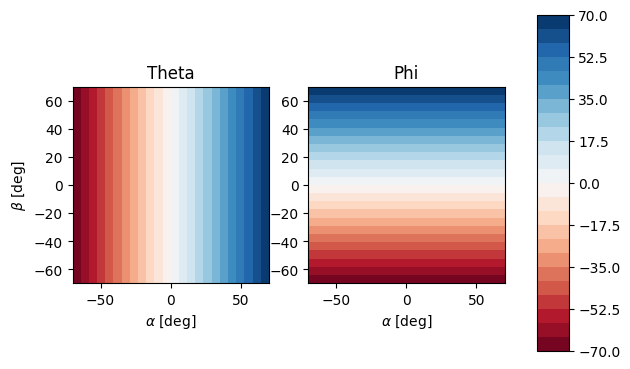

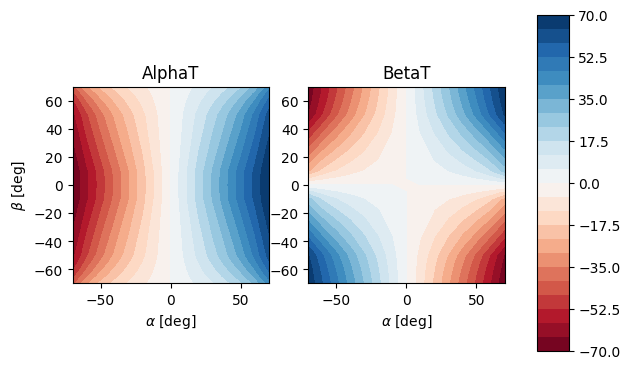

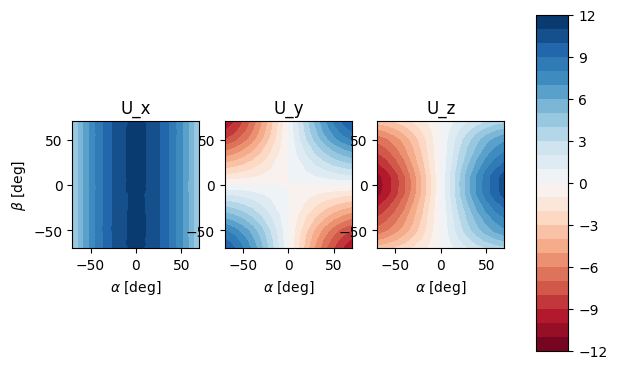

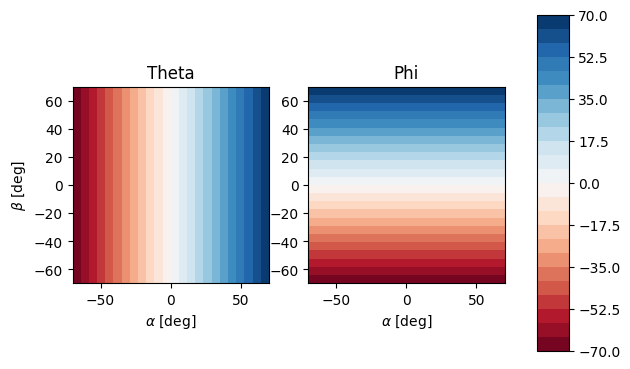

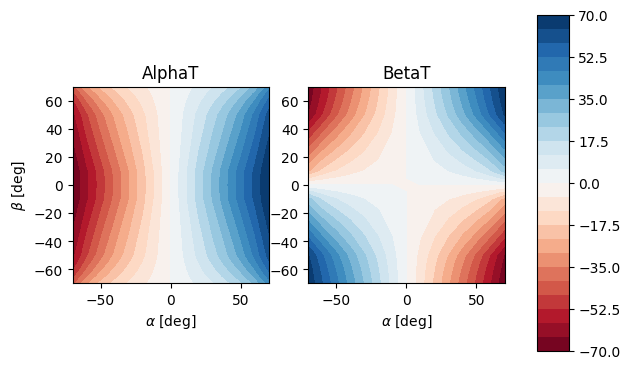

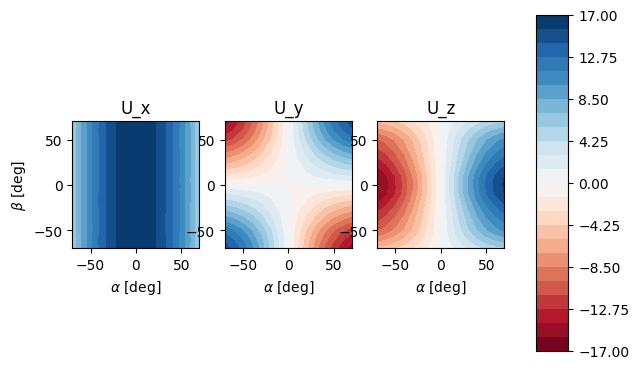

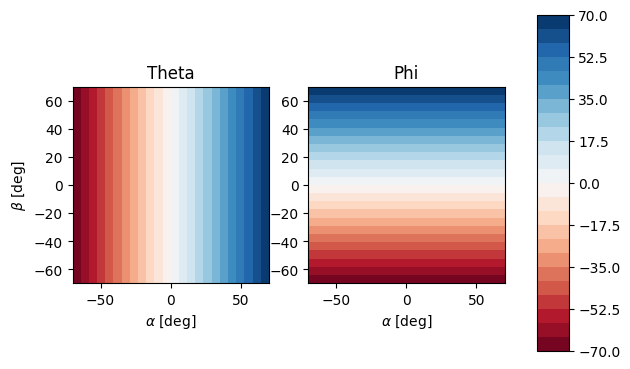

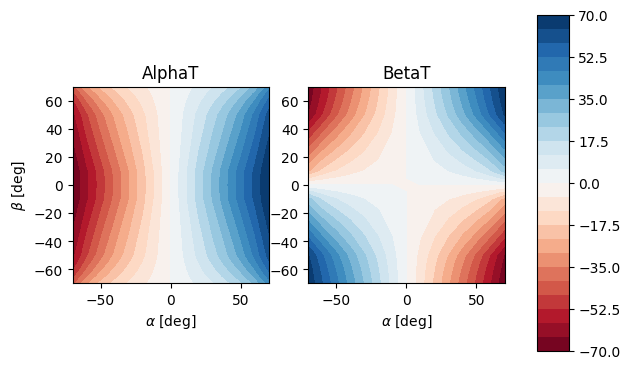

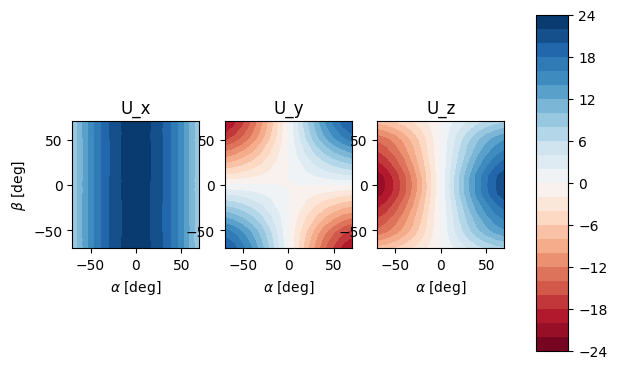

In [ ]:
for k in range(3):
    theta = theta_v[k]
    phi = phi_v[k]
    alphaT = alphaT_v[k]
    betaT = betaT_v[k]
    Uinf = Uinf_v[k]
    Uvec = Uvec_v[k]

    # plot Theta and Phi
    mySubPlot(alpha, beta,
              'Theta', theta,
              'Phi', phi)

    # plot Alpha_T and Beta_T
    mySubPlot(alpha, beta,
              'AlphaT', alphaT,
              'BetaT', betaT)

    # plot the velocity vector field
    mySubPlot(alpha, beta,
                    'U_x', Uvec[:,:,0],
                    'U_y', Uvec[:,:,1],
                    'U_z', Uvec[:,:,2])

### Transformation Validation

**Recall from the principles of the seven-hole probe gives, as a result, two angles and the velocity magnitude.** It doesn't matter with which servo motor system we calibrated the probe. The calibration input is in the tangential or polar reference system, so the results will also be  in the tangential or polar reference system as shown in Figure 2.

To check the transformation between the reference systems, the flow field with $\theta$ and $\phi$ or with $\alpha_T$ and $\beta_T$ has been calculated. If it results in exactly the same flow field as calculated in the last section with $\alpha$ and $\beta$, then the transformation was correct.

From the velocity magnitude and $\alpha_T$ and $\beta_T$ alone, the three components of the velocity vector cannot be estimated. So a transformation from those angles to the polar angles is required. To substitute the equation of the polar system into the tangential:

$$
\begin{align}
  \tan(\alpha_T) &= \frac{u_z}{u_x} = \frac{U_\infty \cdot \sin(\theta) \cdot \cos(\phi)}{U_\infty \cdot \cos(\theta)} \\
  \tan(\beta_T) &  = \frac{u_y}{u_x} = \frac{U_\infty \cdot \sin(\theta) \cdot \sin(\phi)}{U_\infty \cdot \cos(\theta)}
\end{align}
$$

This results in the following relations:

$$
\begin{align}
  \phi &= \arctan \left[ \frac{\tan(\beta_T)}{\tan(\alpha_T)} \right] \\
  \theta &= \arctan \left[ \frac{\tan(\alpha_T)}{\cos(\phi)} \right] \quad \text{or} \quad \theta = \arctan \left[ \frac{\tan(\beta_T)}{\sin(\phi)} \right]
\end{align}
$$

The velocity field from these angles is calculated with ordinary polar equations. Also here, the flow field calculated with these angles should be the same as the flow field calculated with the servo motors angles.

In [ ]:
UvecBack_v = []
UvecBack4Tang_v = []

for k in range(3):
    theta = theta_v[k]
    phi = phi_v[k]
    alphaT = alphaT_v[k]
    betaT = betaT_v[k]
    Uinf = Uinf_v[k]
    Uvec = Uvec_v[k]

    UvecBack = np.zeros((beta.size,alpha.size, 3), dtype=float);
    UvecBack4Tang = np.zeros((beta.size,alpha.size, 3), dtype=float);

    for i, row in enumerate(theta):
        for j, thetaTemp in enumerate(row):

            thetaRad = np.deg2rad(theta[i,j])
            phiRad = np.deg2rad(phi[i,j])
            idx = i * len(row) + j

            UvecBack[i,j, 0] = Uinf * np.cos(thetaRad);
            UvecBack[i,j, 1] = Uinf * np.sin(thetaRad) * np.sin(phiRad);
            UvecBack[i,j, 2] = Uinf * np.sin(thetaRad) * np.cos(phiRad);

            alphaTRad = np.deg2rad(alphaT[i, j])
            betaTRad = np.deg2rad(betaT[i, j])

            phiFromTanRad = np.arctan2(np.tan(betaTRad), np.tan(alphaTRad))
            thetaFromTanRad = np.arctan(np.tan(alphaTRad) / np.cos(phiFromTanRad))

            UvecBack4Tang[i,j, 0] = Uinf * np.cos(thetaFromTanRad)
            UvecBack4Tang[i,j, 1] = Uinf * np.sin(thetaFromTanRad) * np.sin(phiFromTanRad)
            UvecBack4Tang[i,j, 2] = Uinf * np.sin(thetaFromTanRad) * np.cos(phiFromTanRad)


    UvecBack_v.append(UvecBack)
    UvecBack4Tang_v.append(UvecBack4Tang)

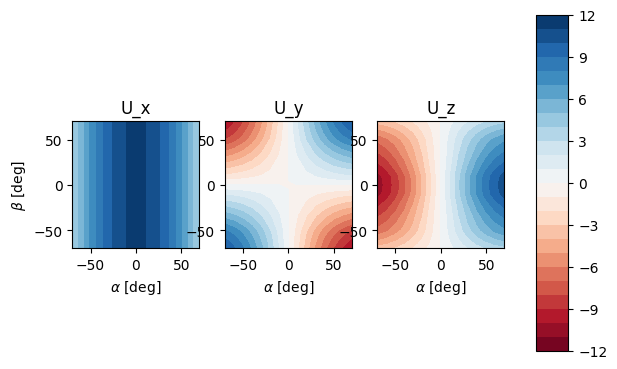

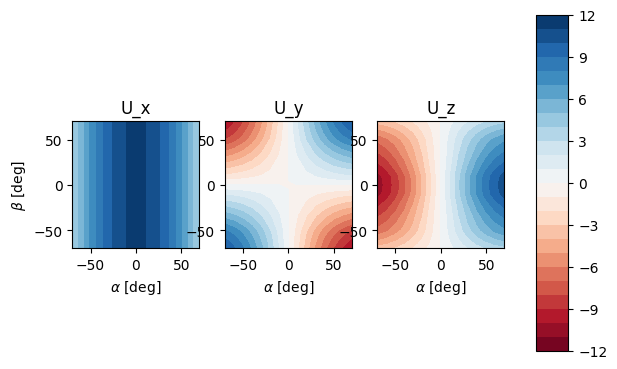

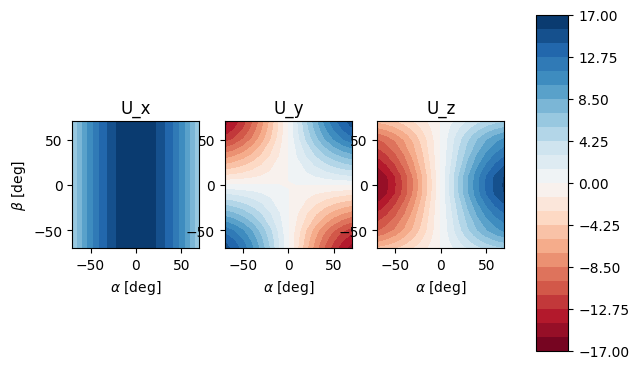

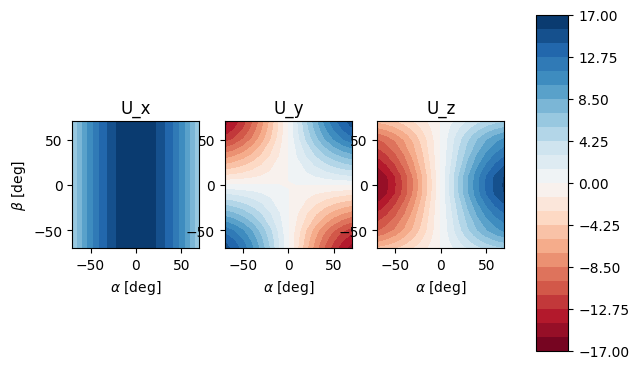

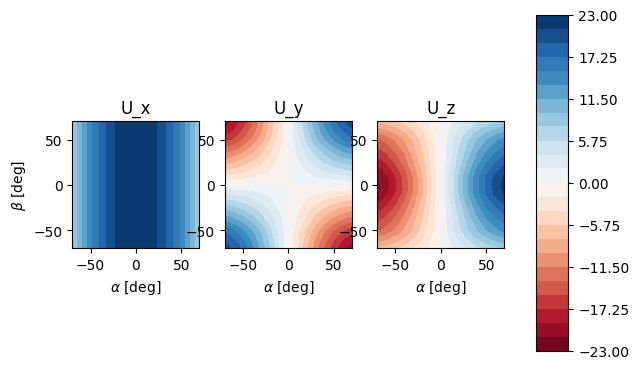

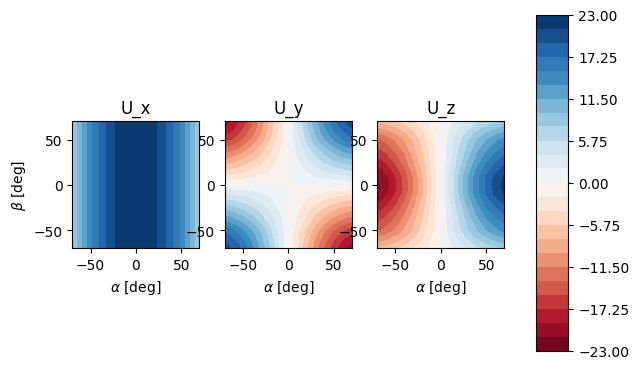

In [ ]:
for k in range(3):
    UvecBack = UvecBack_v[k]
    UvecBack4Tang = UvecBack4Tang_v[k]
    mySubPlot(alpha, beta,
                    'U_x', UvecBack[:,:,0],
                    'U_y', UvecBack[:,:,1],
                    'U_z', UvecBack[:,:,2])

    mySubPlot(alpha, beta,
                    'U_x', UvecBack4Tang[:,:,0],
                    'U_y', UvecBack4Tang[:,:,1],
                    'U_z', UvecBack4Tang[:,:,2])

# References

[1]
Zilliac, G.G.
*Modelling, calibration, and error analysis of seven-hole pressure probes*
(1993) Experiments in Fluids: Experimental Methods and their Applications to Fluid Flow, 14 (1), pp. 104-120.

[2]
Everett, K.N., Gerner, A.A., Durston, D.A.
*Seven-hole cone probes for high angle flow measurement: Theory and calibration*
(1983) AIAA Journal, 21 (7), pp. 992-998.

[3]
L. Ericksen, A & W. Gallington, R & M. Rao, B & S. Barankiewicz, W. (1995). Rapid calibration of seven-hole probes. October 1995. Technical Report. NASA Lewis Research Center; Cleveland, OH, United States.

[4]
A. Yaniv, Seven-Hole Probe Calibration (2019). https://github.com/arielya/SevenHoleProbe